# porekit
- https://github.com/akloster/porekit-python
- http://porekit-python.readthedocs.io

## Installation
- porekit requires python3.5 and recoomend us to create a new conda environment

```
$ ssh sherlock -t sdev
$ ml load anaconda/anaconda3
$ conda create -n porekit python=3.5 anaconda
$ source activate porekit
$ cd ~/software
$ git clone git@github.com:akloster/porekit-python.git
$ cd porekit-python
$ python setup.py develop
$ python setup.py install --user
```

## Summary
- We have a problem to read metadata as we encountered with poretools
- Plot functionalities can be useful (only) if we can debug the issue
- basically this tool has the following functionalities
  - fast5 -> pandas data frame (meta data)
  - pandas data frame <--> hdf5 format (to store meta data)
  - pandas data frame -> plots (with seaborns)
  - have functionalities to convert fast5 to fasta
    - not fully documented
    - `porekit/porekit.py` line 110 indicates this functionality

# Example
- Follow the example on the official document
  - https://porekit-python.readthedocs.io/en/latest/01_Introduction.html

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: No module named 'seaborn'

In [3]:
!pip install seaborn --user

  Using cached seaborn-0.7.1.tar.gz
  Running setup.py bdist_wheel for seaborn ... - \ done
  Stored in directory: /home/ytanigaw/.cache/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import porekit

In [6]:
data_dir = '/home/ytanigaw/data/nanopore/20161006_minion_human_cDNA/'

In [11]:
everything = porekit.gather_metadata(data_dir)

KeyError: 'Unable to open object (Component not found)'

## Encountered to an error
- error while traversing fast5 file meta data

## Use their data

In [24]:
test_data_dir = '/home/ytanigaw/software/porekit-python/tests/data/'

In [25]:
everything = porekit.gather_metadata(test_data_dir)

- it works!

In [26]:
everything[['asic_id', 'channel_number', 'template_length', 'complement_length']].head()

,asic_id,channel_number,template_length,complement_length
filename,,,,
PLSP57501_20151028_Mk1_lambda_RU9_2752_1_ch452_file677_strand.fast5,152762368,452,3948.0,NaN
PLSP57501_20151029_allchannels_RU11_lambda_4808_1_ch28_file108_strand.fast5,152762368,28,NaN,NaN
2016_3_4_3507_1_ch126_read1377_strand.fast5,3571011476,126,NaN,NaN
PLSP57501_20151029_allchannels_RU11_lambda_4808_1_ch471_file329_strand.fast5,152762368,471,NaN,NaN
PLSP57501_default_sample_id_2124_1_ch252_file7_strand.fast5,3442015863,252,NaN,NaN


In [27]:
everything.columns

Index(['absolute_filename', 'format', 'run_id', 'asic_id', 'version_name',
       'device_id', 'flow_cell_id', 'asic_temp', 'heatsink_temp',
       'channel_number', 'channel_range', 'channel_sampling_rate',
       'channel_digitisation', 'channel_offset', 'has_basecalling',
       'basecall_timestamp', 'basecall_version', 'basecall_name',
       'has_template', 'template_length', 'has_complement',
       'complement_length', 'has_2D', '2D_length', 'read_start_time',
       'read_duration', 'read_end_time'],
      dtype='object')

In [28]:
g = everything.groupby(['device_id', 'asic_id', 'run_id'])

In [29]:
df = g.template_length.agg([lambda v: len(v), np.mean, np.max])
df.columns = ['Count', 'Mean template length', 'Max template_length']
df

Count  \
device_id asic_id    run_id                                            
MN02178   32748      a96198c51610f2df5381b3da4378dba90cb4635b    4.0   
MN02297   217752539  aeec32a5b6567efde499475723d41e2370444ad1    4.0   
MN15179   152762368  8da1985a781386de16342edd83dc2fb8c7a0236a    4.0   
                     d636d617db78c8db8c911f58b869d32395cff3e8    4.0   
          3442015863 4918830b4e8663a6ecbaefd9abffa68fe92a0736    4.0   
          4244960115 05fb4df1edb44cce039fbc7f609ee0eb4614229e    4.0   
                     c91c9d31084bb5e2f0bf8f14064c8be2445eeb0e    4.0   
MN16528   3571011476 69ed1ea007613207aa5a162012197a9ffe806e9f    4.0   

                                                               Mean template length  \
device_id asic_id    run_id                                                           
MN02178   32748      a96198c51610f2df5381b3da4378dba90cb4635b               1008.25   
MN02297   217752539  aeec32a5b6567efde499475723d41e2370444ad1               4734.25   
MN15179   152762368  8da1985a781386de16342edd83dc2fb8c7a0236a               1941.50   
                     d636d617db78c8db8c911f58b869d32395cff3e8                   NaN   
          3442015863 4918830b4e8663a6ecbaefd9abffa68fe92a0736                   NaN   
          4244960115 05fb4df1edb44cce039fbc7f609ee0eb4614229e                783.00   
                     c91c9d31084bb5e2f0bf8f14064c8be2445eeb0e               1597.25   
MN16528   3571011476 69ed1ea007613207aa5a162012197a9ffe806e9f                   NaN   

                                                               Max template_length  
device_id asic_id    run_id                                                         
MN02178   32748      a96198c51610f2df5381b3da4378dba90cb4635b               1067.0  
MN02297   217752539  aeec32a5b6567efde499475723d41e2370444ad1               6923.0  
MN15179   152762368  8da1985a781386de16342edd83dc2fb8c7a0236a               3948.0  
                     d636d617db78c8db8c911f58b869d32395cff3e8                  NaN  
          3442015863 4918830b4e8663a6ecbaefd9abffa68fe92a0736                  NaN  
          4244960115 05fb4df1edb44cce039fbc7f609ee0eb4614229e               2029.0  
                     c91c9d31084bb5e2f0bf8f14064c8be2445eeb0e               1825.0  
MN16528   3571011476 69ed1ea007613207aa5a162012197a9ffe806e9f                  NaN

In [30]:
everything.to_hdf("/tmp/everything.h5", "meta")
# used /tmp dir

/home/ytanigaw/.conda/envs/porekit/lib/python3.5/site-packages/pandas/core/generic.py:1101: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['absolute_filename', 'format', 'run_id', 'asic_id', 'version_name', 'device_id', 'flow_cell_id', 'basecall_version', 'basecall_name', 'has_template', 'has_complement', 'has_2D']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [32]:
!ls -l /tmp/everything.h5

-rw-r--r-- 1 ytanigaw mrivas 1077144 Oct 17 16:07 /tmp/everything.h5


## trying some plot functionalities
- https://porekit-python.readthedocs.io/en/latest/02_Plots.html

In [16]:
df = pd.read_hdf("/home/ytanigaw/software/porekit-python/examples/data/ru9_meta.h5", "meta")

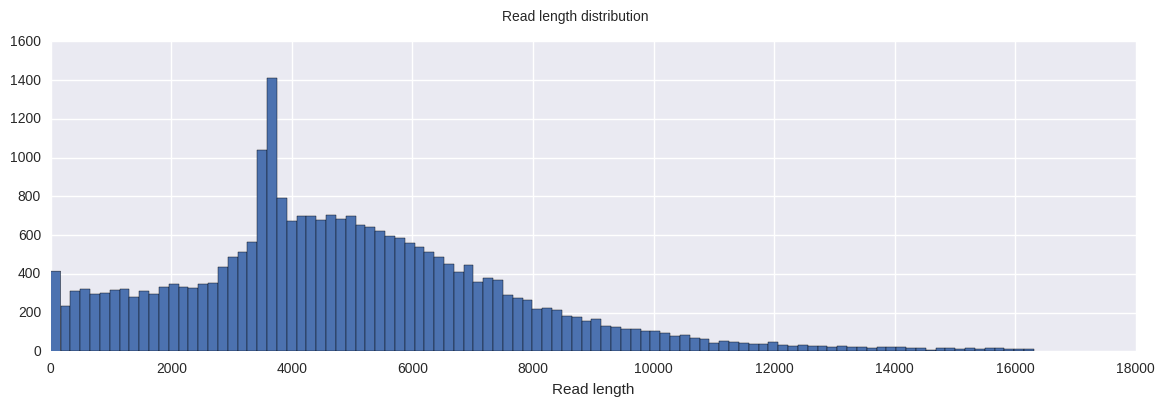

In [17]:
porekit.plots.read_length_distribution(df);

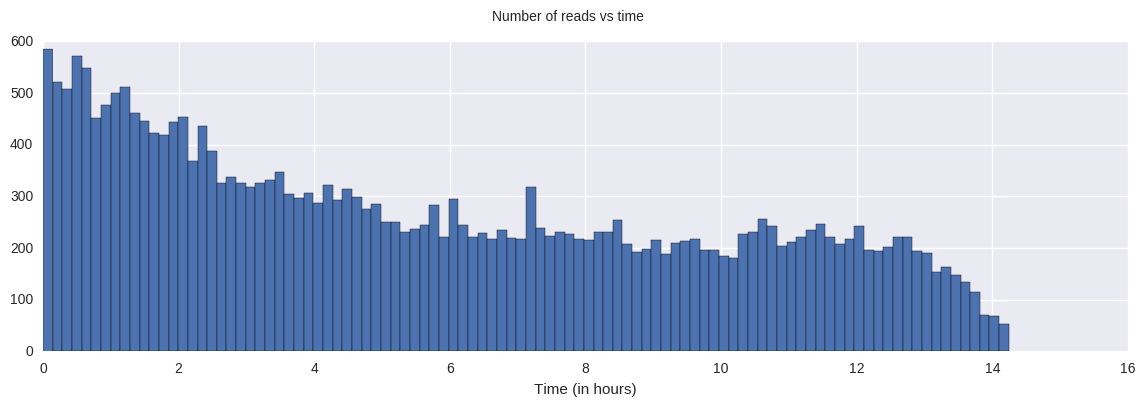

In [18]:
porekit.plots.reads_vs_time(df);

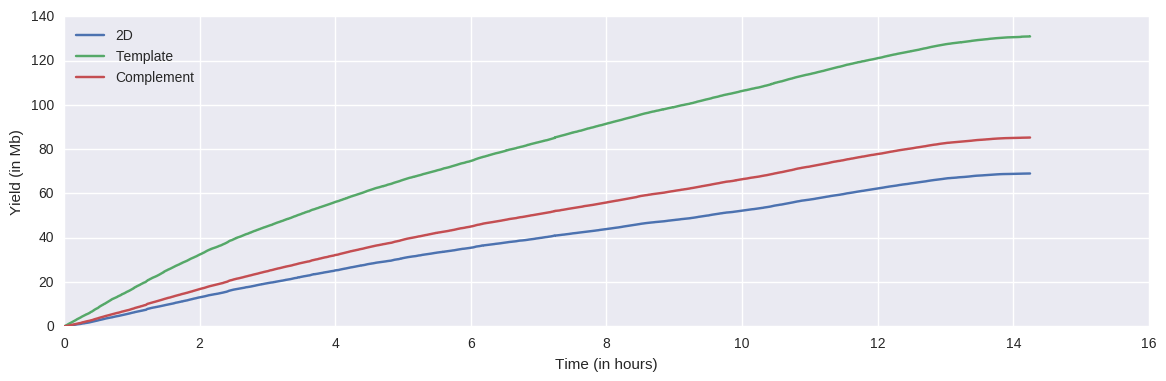

In [19]:
porekit.plots.yield_curves(df);

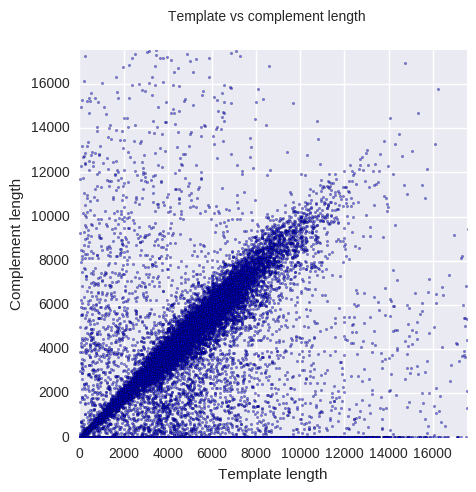

In [20]:
porekit.plots.template_vs_complement(df);

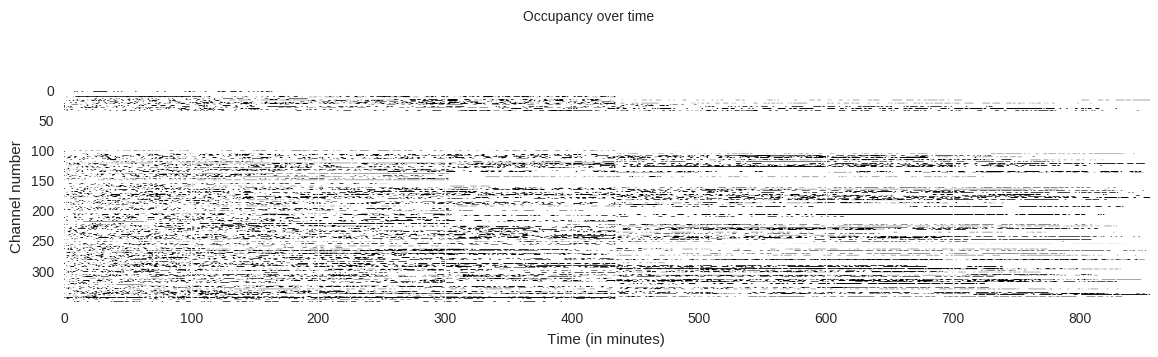

In [21]:
porekit.plots.occupancy(df);

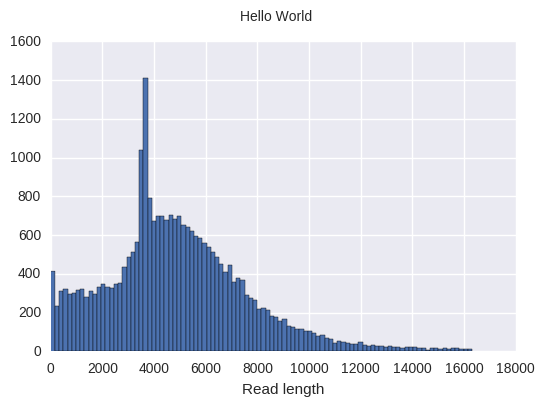

In [22]:
f, ax = porekit.plots.read_length_distribution(df)
f.suptitle("Hello World");
f.set_figwidth(6)

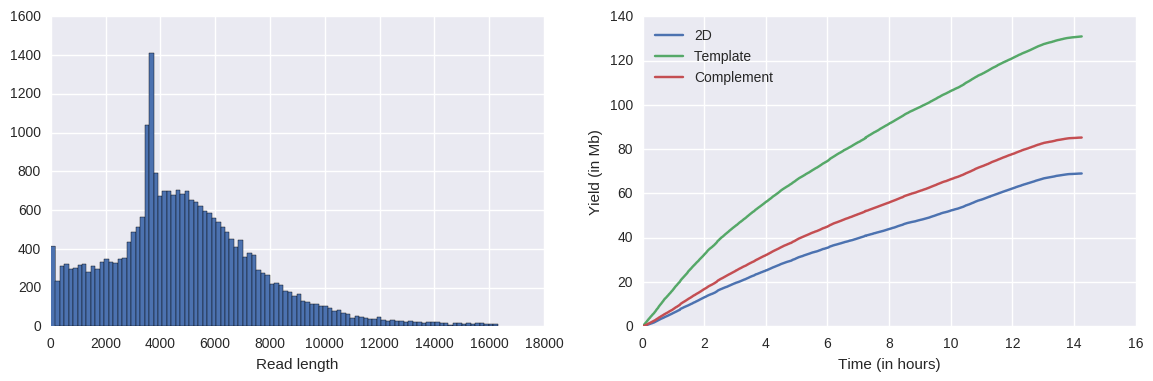

In [23]:
f, axes = plt.subplots(1,2)
f.set_figwidth(14)
ax1, ax2 = axes
porekit.plots.read_length_distribution(df, ax=ax1);
porekit.plots.yield_curves(df, ax=ax2);

## repeat the same thing for the save hdf5 data

In [33]:
df = pd.read_hdf("/tmp/everything.h5", "meta")

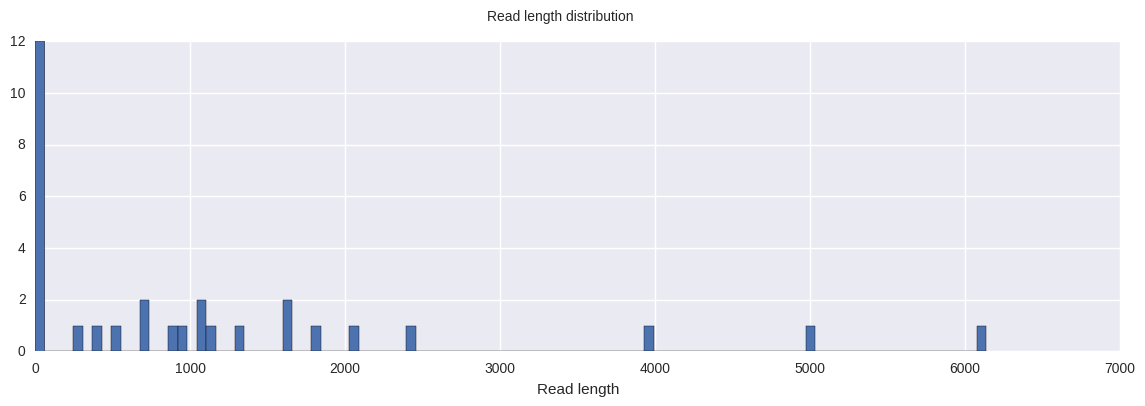

In [34]:
porekit.plots.read_length_distribution(df);

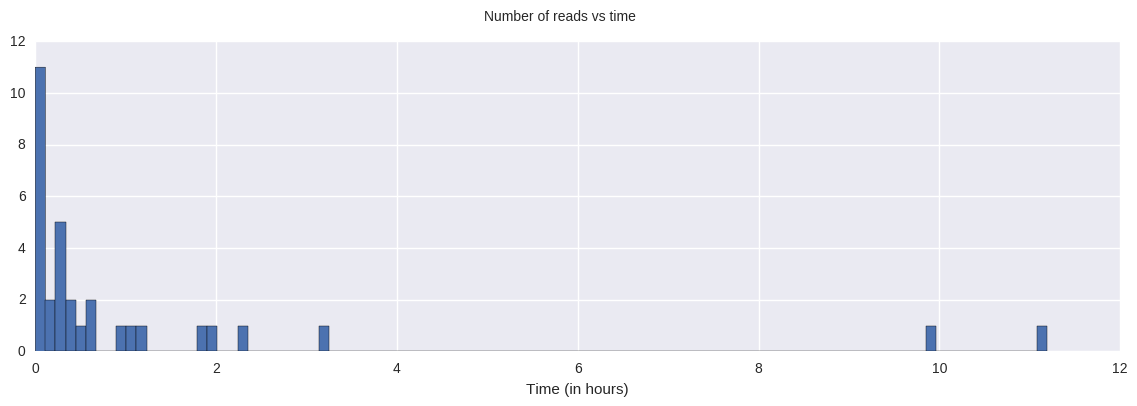

In [35]:
porekit.plots.reads_vs_time(df);

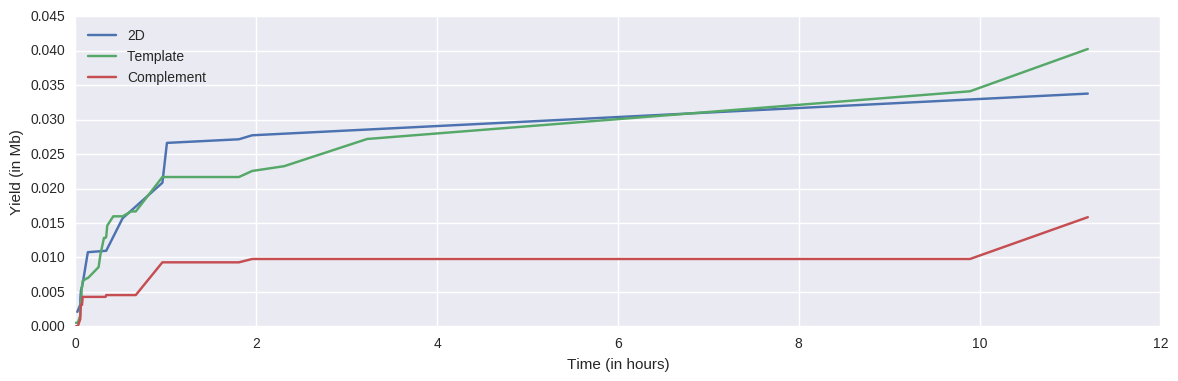

In [36]:
porekit.plots.yield_curves(df);

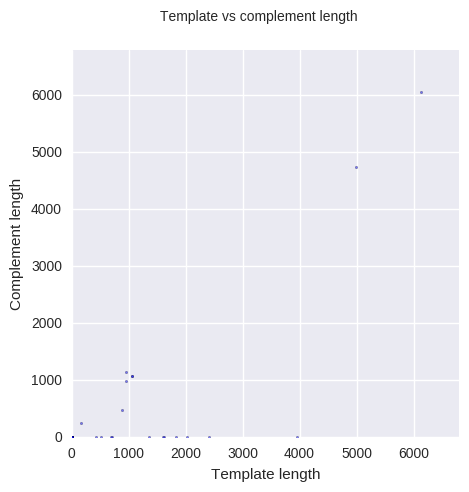

In [37]:
porekit.plots.template_vs_complement(df);

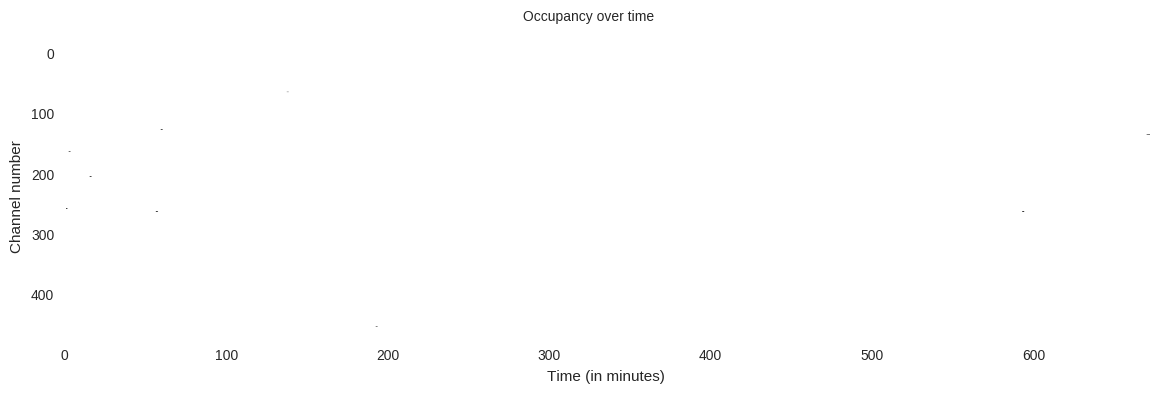

In [38]:
porekit.plots.occupancy(df);

# git

In [7]:
!git status

# On branch master
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	20161017_porekit.ipynb
nothing added to commit but untracked files present (use "git add" to track)


In [8]:
!git add 20161017_porekit.ipynb

In [9]:
!git commit -m "add note for porekit"

[master 6ffeef6] add note for porekit
 1 file changed, 160 insertions(+)
 create mode 100644 notes/20161017_porekit.ipynb


In [10]:
!git push origin master

Counting objects: 6, done.
Delta compression using up to 16 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.66 KiB, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local objects.
To git@github.com:rivas-lab/nanopore.git
   75153ca..6ffeef6  master -> master
